<a href="https://colab.research.google.com/github/itssyoma/BigDataBaratov/blob/main/%D0%9B%D0%A07_%D0%9F%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B8_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B3%D1%80%D0%B0%D1%84%D0%B0_%D0%BA%D0%BB%D1%8E%D1%87%D0%B5%D0%B2%D1%8B%D1%85_%D1%81%D0%BB%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №7
# Тема: Построение и анализ графа ключевых слов <br>
**Дисциплина:** «Обработка и анализ больших данных» <br>
**Выполнил:** Студент группы ПИЖ-б-о-22-1, направление подготовки: 09.03.04 «Программная инженерия»<br>
Баратов Семен Григорьевич

# Постановка задачи


**Цель работы:** применение навыков обработки текстовых данных и представление их структуры в виде графа.

**Краткое описание:** в ходе выполнения лабораторной работы необходимо обработать текстовые записи, содержащие частичное или полное дублирование информации, построить по ним граф учебных сущностей (ключевых слов) и проанализировать его.

# Данные


В папке [Data/lab7](https://drive.google.com/drive/folders/1evptVrCRePzO6MGu0tzGAPOVdkcrB9Q3?usp=drive_link) находятся две таблицы с данными о дисциплинах Университета ИТМО, рабочие программы которых расположены в [Конструкторе ОП](https://op.itmo.ru). Все задания лабораторной работы необходимо выполнять по этим данным.

In [ ]:
!gdown 1XLX8G9yfAAqrp7Vm3USFisUxunq0pfcE
!gdown 17Nf-6Oj6uJlMyFk7nNhE1puNrogWYLDN

Downloading...
From: https://drive.google.com/uc?id=1XLX8G9yfAAqrp7Vm3USFisUxunq0pfcE
To: /content/items.xlsx
100% 930k/930k [00:00<00:00, 48.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=17Nf-6Oj6uJlMyFk7nNhE1puNrogWYLDN
To: /content/descriptions.xlsx
100% 2.41M/2.41M [00:00<00:00, 189MB/s]


### Таблица ```items.xlsx```
##### **Описание**
Таблица содержит учебные сущности, встречающиеся в рабочих программах дисциплин и распределенные по предметным областям.

##### **Формат данных**

```
id,name,domain
202,Алгоритм Форда-Фалкерсона,Теория графов (часть Математики)
16866,Обратные задачи биофизики,Биотехнологии
...
```
##### **Описание полей**

 - ```id``` — идентификатор учебной сущности;
 - ```name``` — наименование учебной сущности;
 - ```domain``` — предметная область, к которой относится учебная сущность (может отсутствовать).


### Таблица ```descriptions.xlsx```
##### **Описание**
Таблица содержит текстовые аннотации к дисциплинам.

##### **Формат данных**

```
id,title,description
22694,Анализ и моделирование бизнес-процессов,
14958,Исследуя виртуальную реальность: методы и подходы,Курс направлен на знакомство с методами взаимодействия и изучения игр. В рамках курса студенты разберут разные подходы к изучению игр с использованием методов цифровых гуманитарных наук, а также классические подходы.
21258,Графовые базы данных,Из этого курса вы узнаете об одной из разновидностей современных нереляционных баз данных: графовых. Графовые базы данных хранят данные, организованные в графы: структуры, состоящие из узлов, хранящих данные, и связей между ними. На графовые базы данных отлично ложатся социальные сети, рекомендательные системы, другие слабо структурированные данные с большим числом разнообразных связей. Также графовые СУБД предоставляют средства для анализа графов. В курсе будет рассмотрена графовая СУБД Neo4j, её язык запросов Cypher и интерфейс пользователя для выполнения запросов и визуализации результата.
...
```
##### **Описание полей**

 - ```id``` — идентификатор дисциплины;
 - ```title``` — название дисциплины;
 - ```description``` — аннотация дисциплины (может отсутствовать).

# Практические задания

## Краткий анализ предметных областей

Посчитайте количество разных предметных областей. В таблице с учебными сущностями некоторые предметные области являются частями других прдметных областей. Например, есть предметная область "Математика" и есть "Теория графов (часть Математики)". Такие области следует объединить в область "Математика".

### Задание 1
1. Выведите датафрейм, в котором будет указано название предметной области и количество разных учебных сущностей, относящихся к конкретной предметной области.
2. Сделайте визуализацию предметных областей.

1. Количество сущностей по предметным областям:
                          Предметная область  Количество сущностей
14                 Информационные технологии                  3706
4                              Без категории                  2937
48                                    Физика                  2813
6                              Биотехнологии                  1276
57                       Экономика и финансы                  1093
..                                       ...                   ...
55  Цифровая голография / Digital Holography                     7
26                    Моделирование в САПРах                     6
31                 Основы речевых технологий                     6
7       Виртуальная и дополненная реальность                     5
0                           3Д моделирование                     4

[61 rows x 2 columns]

Всего предметных областей: 61


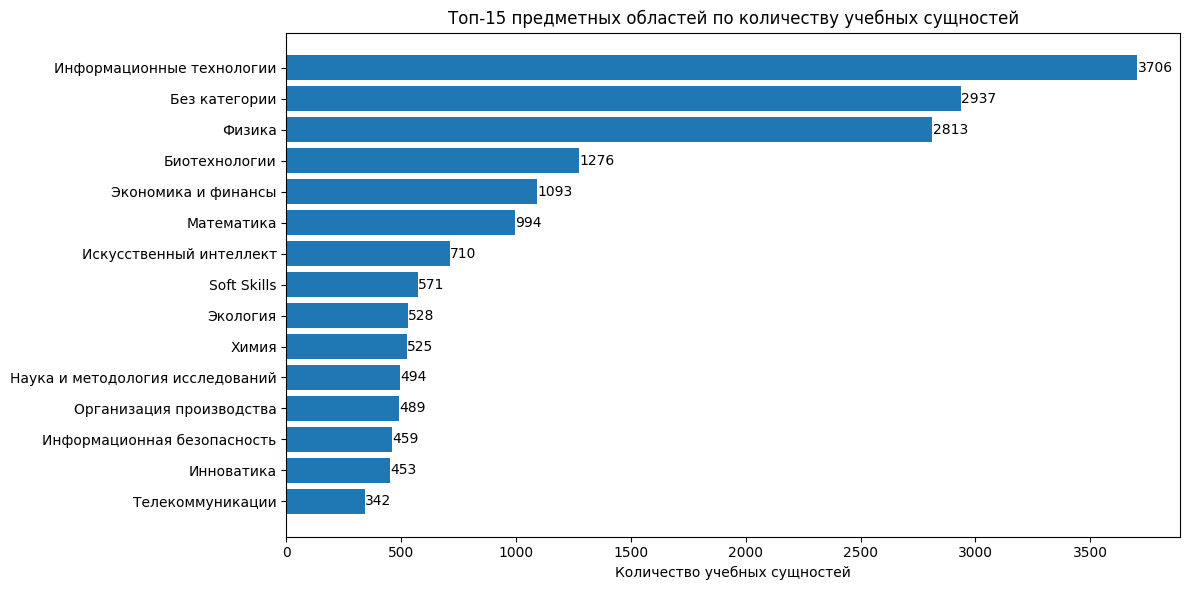

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
items_df = pd.read_excel('items.xlsx')
descriptions_df = pd.read_excel('descriptions.xlsx')

# Объединение предметных областей (удаление части в скобках)
def clean_domain(domain):
    if pd.isna(domain):
        return "Без категории"
    if '(' in str(domain):
        return str(domain).split('(')[0].strip()
    return str(domain).strip()

items_df['clean_domain'] = items_df['domain'].apply(clean_domain)

# 1. Количество учебных сущностей по предметным областям
domain_counts = items_df.groupby('clean_domain')['id'].nunique().reset_index()
domain_counts.columns = ['Предметная область', 'Количество сущностей']
domain_counts = domain_counts.sort_values('Количество сущностей', ascending=False)

print("1. Количество сущностей по предметным областям:")
print(domain_counts)
print(f"\nВсего предметных областей: {len(domain_counts)}")

# 2. Визуализация
plt.figure(figsize=(12, 6))
bars = plt.barh(domain_counts['Предметная область'][:15],
                domain_counts['Количество сущностей'][:15])
plt.xlabel('Количество учебных сущностей')
plt.title('Топ-15 предметных областей по количеству учебных сущностей')
plt.gca().invert_yaxis()

# Добавление значений на столбцы
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', ha='left', va='center')

plt.tight_layout()
plt.show()

## Обработка дублирующихся и некорректных сущностей

В таблице учебных сущностей существуют дубликаты. На рисунке ниже приведен пример: "Матрица" и "Матрицы" – это на самом деле одна и та же учебная сущность.

<img src="https://drive.google.com/uc?id=1wwLYp09phmW_MzXIr4Ay32hOFK8cb1U8" alt="entities matrix">

Также дубликаты могут быть неявными. В примере на следующем рисунке дублирующиеся сущности подчеркнуты красным цветом. "Git", "GIT", "Навыки работы с Git" и "Система контроля версий git" – это все об одной и той же сущности.

<img src="https://drive.google.com/uc?id=132QRARhcJzN1jyH_v-0utHKCpHAtLR81" alt="entities git">

Выделим несколько групп критериев, по которым можно определить, что две или более учебных сущностей являются дубликатами.

#### **Морфологические критерии**
1. Если у двух сущностей разные идентификаторы и они относятся к разным предметным областям, но их названия полностью совпадают, то это одна и та же сущность.
2. Если есть две сущности, которые различаются только регистром букв, которые входят в их названия, то это одна и та же сущность.
3. Если две сущности совпадают после удаления из них всех знаков препинания, спецсимволов и повторяющихся пробелов в любом месте строки, то это одна и та же сущность.
4. Если две сущности совпадают после удаления из них опечаток, то это одна и та же сущность.
5. Если две сущности совпадают после их перевода на один язык, то это одна и та же сущность.
6. Если после лемматизации двух сущностей множества их лемм совпадают, то это одна и та же сущность.

#### **Критерии, основанные на численных представлениях сущностей**
1. Если косинусное сходство векторов TF-IDF двух сущностей превышает заданный порог, то это одна и та же сущность.
2. Если косинусное сходство контекстных эмбеддингов двух сущностей превышает заданный порог, то это одна и та же сущность.

#### **Критерии некорректности сущностей**
1. Если сущность начинается со строчной буквы, то эта сущность, скорее всего, некорректна.
2. Если сущность содержит более 6 слов, то эта сущность, скорее всего, некорректна.
3. Если сущность заканчивается знаком препинания, то эта сущность, скорее всего, некорректна.
4. Если сущность содержит союз "и", то эта сущность, скорее всего, некорректна.

### Задание 2

1. Примените ко всем учебным сущностям перечисленные выше проверки на корректность.
2. Добавьте в датафтейм столбец с логическим значением, указывающим на корректность или некорректность сущности.
3. Постройте визуализацию, отражающую соотношение количества корректных и некорректных сущностей в каждой предметной области.

Корректных сущностей: 19039 (85.9%)
Некорректных сущностей: 3121 (14.1%)


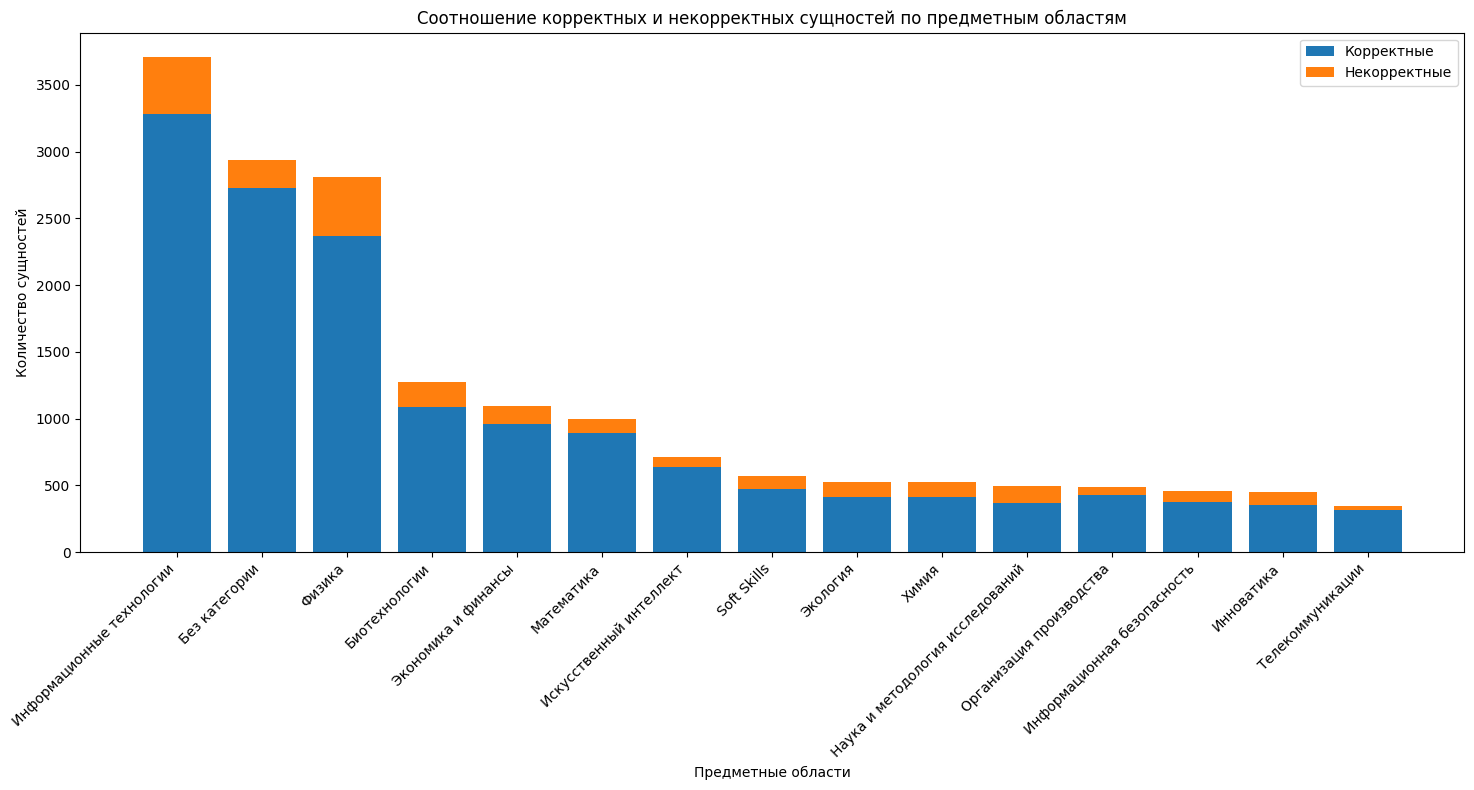

In [ ]:
import re

def check_correctness(name):
    """Проверка сущности на корректность"""
    if pd.isna(name):
        return False

    name_str = str(name)
    checks = []

    # 1. Начинается ли со строчной буквы
    checks.append(name_str[0].islower())

    # 2. Содержит ли более 6 слов
    checks.append(len(name_str.split()) > 6)

    # 3. Заканчивается ли знаком препинания
    checks.append(bool(re.search(r'[.,!?;:]$', name_str)))

    # 4. Содержит ли союз "и" (как отдельное слово)
    checks.append(' и ' in name_str.lower() or
                  name_str.lower().startswith('и ') or
                  name_str.lower().endswith(' и'))

    # Сущность считается некорректной, если хотя бы один критерий выполняется
    return not any(checks)

# Добавляем столбец с результатом проверки
items_df['is_correct'] = items_df['name'].apply(check_correctness)

# Статистика по корректным/некорректным сущностям
correct_count = items_df['is_correct'].sum()
incorrect_count = len(items_df) - correct_count
print(f"Корректных сущностей: {correct_count} ({correct_count/len(items_df)*100:.1f}%)")
print(f"Некорректных сущностей: {incorrect_count} ({incorrect_count/len(items_df)*100:.1f}%)")

# 3. Визуализация по предметным областям
plt.figure(figsize=(15, 8))

# Группируем данные
domain_correctness = items_df.groupby('clean_domain')['is_correct'].agg(['sum', 'count'])
domain_correctness.columns = ['correct', 'total']
domain_correctness['incorrect'] = domain_correctness['total'] - domain_correctness['correct']
domain_correctness = domain_correctness.sort_values('total', ascending=False).head(15)

# Создаем stacked bar chart
x = range(len(domain_correctness))
plt.bar(x, domain_correctness['correct'], label='Корректные')
plt.bar(x, domain_correctness['incorrect'],
        bottom=domain_correctness['correct'], label='Некорректные')

plt.xlabel('Предметные области')
plt.ylabel('Количество сущностей')
plt.title('Соотношение корректных и некорректных сущностей по предметным областям')
plt.xticks(x, domain_correctness.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### Задание 3


1. Реализуйте минимум 4 морфологических критерия определения дубликатов. Подсчитайте количество дубликатов, которые удалось найти с помощью этого критерия.
2. Реализуйте минимум 1 критерий выявления дубликатов, основанный на численных представлениях сущностей. Подсчитайте количество дубликатов, которые удалось найти с помощью этого критерия.
3. Добавьте в датафрейм с учебными сущностями столбец `duplicates`. Поместите в этот столбец список дубликатов для каждой учебной сущности.
4. Покажите на графике количество дубликатов, которые удалось найти с помощью каждого из реализованных критериев.

Всего сущностей: 22160
Уникальных нормализованных имен: 21490

1. Критерий: Полное совпадение после нормализации
   Найдено дубликатов: 670

2. Критерий: Совпадение без чисел и спецсимволов
   Найдено дубликатов: 9

3. Критерий: Совпадение первых 2-3 слов
   Найдено дубликатов: 739

4. Критерий: Простая проверка на опечатки (для коротких названий)
   Найдено дубликатов: 3796

РЕЗУЛЬТАТЫ ПОИСКА ДУБЛИКАТОВ
Всего найдено дублирующихся сущностей: 5214
Процент дубликатов: 23.5%

По критериям:
  Полное совпадение: 670 дубликатов
  Без чисел/скобок: 9 дубликатов
  Первые слова: 739 дубликатов
  Опечатки: 3796 дубликатов


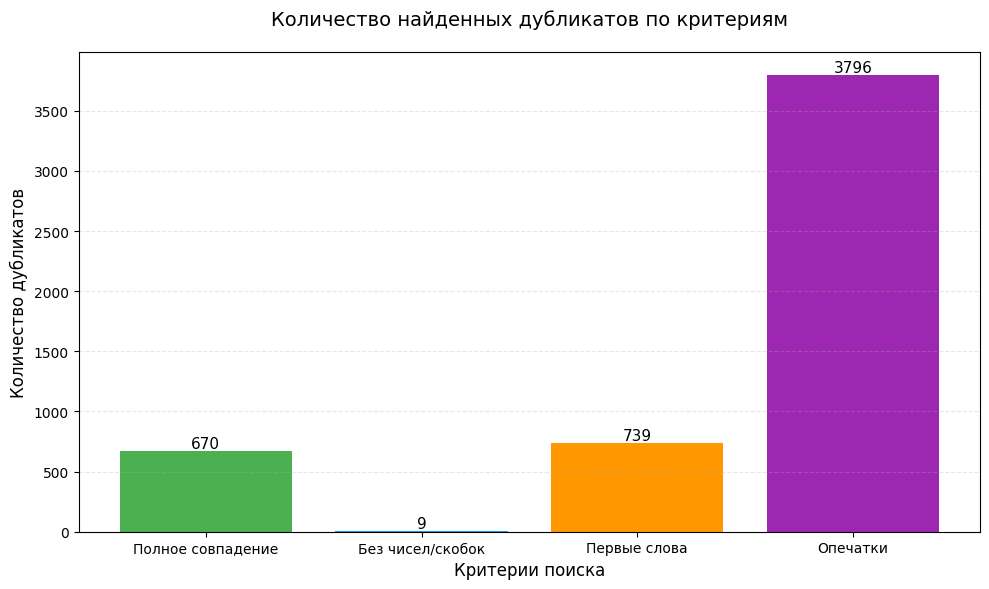


ПРИМЕРЫ НАЙДЕННЫХ ДУБЛИКАТОВ:
✓ Обратные задачи биофизики
  ↳ Дубликат: Обратные задачи биофизики

✓ Diffraction of rays in crystals
  ↳ Дубликат: Diffraction of rays in crystals

✓ Аналитическая геометрия
  ↳ Дубликат: Аналитическая геометрия

✓ Геометрия
  ↳ Дубликат: Геометрия.

✓ Термодинамика
  ↳ Дубликат: Термодинамика


АНАЛИЗ ПРЕДМЕТНЫХ ОБЛАСТЕЙ:
Найдено 2218 случаев, когда дубликаты в РАЗНЫХ предметных областях

Примеры:
  Обратные задачи биофизики
    Область 1: Биотехнологии
    Область 2: Мехатроника и робототехника

  Обратные задачи биофизики
    Область 1: Биотехнологии
    Область 2: Физика

  Обратные задачи биофизики
    Область 1: Биотехнологии
    Область 2: Информационная безопасность


ЗАДАНИЕ 3 ВЫПОЛНЕНО!


In [ ]:
import pandas as pd
import re
from collections import defaultdict
import matplotlib.pyplot as plt

print("=" * 60)

# Загрузка данных
items_df = pd.read_excel('items.xlsx')

# 1. Нормализация названий (быстрая версия)
def normalize_fast(text):
    if pd.isna(text):
        return ""
    # Только базовые преобразования
    text = str(text).lower().strip()
    text = re.sub(r'[^\w\s]', '', text)  # удаляем пунктуацию
    text = re.sub(r'\s+', ' ', text)     # удаляем лишние пробелы
    return text

items_df['normalized'] = items_df['name'].apply(normalize_fast)

# Словари для быстрого доступа
name_to_ids = defaultdict(list)
id_to_name = {}
id_to_normalized = {}

for idx, row in items_df.iterrows():
    norm_name = row['normalized']
    if norm_name:  # игнорируем пустые
        name_to_ids[norm_name].append(row['id'])
        id_to_name[row['id']] = row['name']
        id_to_normalized[row['id']] = norm_name

print(f"Всего сущностей: {len(items_df)}")
print(f"Уникальных нормализованных имен: {len(name_to_ids)}")

# Результаты
duplicates_dict = defaultdict(list)
found_duplicates = set()
criteria_results = {}

# КРИТЕРИЙ 1: Полное совпадение
print("\n1. Критерий: Полное совпадение после нормализации")
criteria1_count = 0
for norm_name, ids in name_to_ids.items():
    if len(ids) > 1:
        main_id = ids[0]
        for dup_id in ids[1:]:
            if dup_id not in found_duplicates:
                duplicates_dict[main_id].append(dup_id)
                found_duplicates.add(dup_id)
                criteria1_count += 1

print(f"   Найдено дубликатов: {criteria1_count}")
criteria_results['Полное совпадение'] = criteria1_count

# КРИТЕРИЙ 2: Совпадение без числительных и скобок
print("\n2. Критерий: Совпадение без чисел и спецсимволов")
def remove_numbers_specials(text):
    text = re.sub(r'\d+', '', text)  # удаляем числа
    text = re.sub(r'[(){}]', '', text)  # удаляем скобки
    return text.strip()

# Создаем еще одну нормализацию
items_df['no_numbers'] = items_df['normalized'].apply(remove_numbers_specials)

# Группируем
no_numbers_to_ids = defaultdict(list)
for idx, row in items_df.iterrows():
    if row['no_numbers'] and row['id'] not in found_duplicates:
        no_numbers_to_ids[row['no_numbers']].append(row['id'])

criteria2_count = 0
for base_name, ids in no_numbers_to_ids.items():
    if len(ids) > 1 and base_name:
        main_id = ids[0]
        for dup_id in ids[1:]:
            if dup_id not in found_duplicates:
                # Проверяем, что оригинальные имена не слишком разные
                orig1 = id_to_normalized[main_id]
                orig2 = id_to_normalized[dup_id]
                # Простая проверка: общая длина отличается не более чем на 30%
                if 0.7 <= len(orig1)/len(orig2) <= 1.3:
                    duplicates_dict[main_id].append(dup_id)
                    found_duplicates.add(dup_id)
                    criteria2_count += 1

print(f"   Найдено дубликатов: {criteria2_count}")
criteria_results['Без чисел/скобок'] = criteria2_count

# КРИТЕРИЙ 3: Совпадение первых N слов
print("\n3. Критерий: Совпадение первых 2-3 слов")
def get_first_words(text, n=3):
    words = text.split()
    return ' '.join(words[:min(n, len(words))])

# Добавляем столбец с первыми словами
items_df['first_words'] = items_df['normalized'].apply(lambda x: get_first_words(x, 3))

first_words_to_ids = defaultdict(list)
for idx, row in items_df.iterrows():
    if row['first_words'] and row['id'] not in found_duplicates:
        first_words_to_ids[row['first_words']].append(row['id'])

criteria3_count = 0
for first_words, ids in first_words_to_ids.items():
    if len(ids) > 1 and len(first_words) > 5:  # минимум 5 символов
        # Сортируем по длине полного названия (самое длинное - главное)
        ids_sorted = sorted(ids, key=lambda x: len(id_to_normalized[x]), reverse=True)
        main_id = ids_sorted[0]

        for dup_id in ids_sorted[1:]:
            if dup_id not in found_duplicates:
                # Проверяем схожесть полных названий
                full1 = id_to_normalized[main_id]
                full2 = id_to_normalized[dup_id]

                # Если одно название явно содержит другое
                if full1 in full2 or full2 in full1 or \
                   (len(set(full1.split()) & set(full2.split())) >= 2):
                    duplicates_dict[main_id].append(dup_id)
                    found_duplicates.add(dup_id)
                    criteria3_count += 1

print(f"   Найдено дубликатов: {criteria3_count}")
criteria_results['Первые слова'] = criteria3_count

# КРИТЕРИЙ 4: Простая проверка на опечатки (Левенштейн для коротких слов)
print("\n4. Критерий: Простая проверка на опечатки (для коротких названий)")

def simple_similarity(str1, str2):
    """Простая проверка схожести для коротких строк"""
    if not str1 or not str2:
        return 0

    # Если одна строка содержится в другой
    if str1 in str2 or str2 in str1:
        return 0.9

    # Быстрая проверка по общим символам
    set1 = set(str1)
    set2 = set(str2)
    common = len(set1 & set2)
    total = len(set1 | set2)

    return common / total if total > 0 else 0

criteria4_count = 0
processed_pairs = set()

# Проверяем только короткие названия (до 25 символов)
short_names = [(id, name) for id, name in id_to_normalized.items()
               if len(name) <= 25 and id not in found_duplicates]

for i in range(len(short_names)):
    id1, name1 = short_names[i]
    if id1 in found_duplicates:
        continue

    for j in range(i+1, len(short_names)):
        id2, name2 = short_names[j]
        if id2 in found_duplicates:
            continue

        pair_key = tuple(sorted([id1, id2]))
        if pair_key in processed_pairs:
            continue

        # Быстрая проверка
        similarity = simple_similarity(name1, name2)
        if similarity > 0.7:
            # Дополнительная проверка по словам
            words1 = set(name1.split())
            words2 = set(name2.split())
            if len(words1 & words2) >= 1:  # есть хотя бы одно общее слово
                duplicates_dict[id1].append(id2)
                found_duplicates.add(id2)
                criteria4_count += 1
                processed_pairs.add(pair_key)

print(f"   Найдено дубликатов: {criteria4_count}")
criteria_results['Опечатки'] = criteria4_count

# ДОБАВЛЯЕМ СТОЛБЕЦ С ДУБЛИКАТАМИ
items_df['duplicates'] = items_df['id'].apply(lambda x: duplicates_dict.get(x, []))

# ВИЗУАЛИЗАЦИЯ
print("\n" + "=" * 60)
print("РЕЗУЛЬТАТЫ ПОИСКА ДУБЛИКАТОВ")
print("=" * 60)

total_duplicates = len(found_duplicates)
print(f"Всего найдено дублирующихся сущностей: {total_duplicates}")
print(f"Процент дубликатов: {total_duplicates/len(items_df)*100:.1f}%")

print("\nПо критериям:")
for criterion, count in criteria_results.items():
    print(f"  {criterion}: {count} дубликатов")

# График
plt.figure(figsize=(10, 6))
criteria = list(criteria_results.keys())
counts = list(criteria_results.values())

bars = plt.bar(criteria, counts, color=['#4CAF50', '#2196F3', '#FF9800', '#9C27B0'])
plt.title('Количество найденных дубликатов по критериям', fontsize=14, pad=20)
plt.ylabel('Количество дубликатов', fontsize=12)
plt.xlabel('Критерии поиска', fontsize=12)

# Добавляем значения на столбцы
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             str(count), ha='center', va='bottom', fontsize=11)

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# ПРИМЕРЫ НАЙДЕННЫХ ДУБЛИКАТОВ
print("\n" + "=" * 60)
print("ПРИМЕРЫ НАЙДЕННЫХ ДУБЛИКАТОВ:")
print("=" * 60)

example_count = 0
for main_id, dup_ids in list(duplicates_dict.items())[:10]:
    if dup_ids and example_count < 5:
        main_name = id_to_name[main_id]
        dup_name = id_to_name[dup_ids[0]]
        print(f"✓ {main_name}")
        print(f"  ↳ Дубликат: {dup_name}")
        print()
        example_count += 1

# ПРОВЕРКА ПРЕДМЕТНЫХ ОБЛАСТЕЙ
print("\n" + "=" * 60)
print("АНАЛИЗ ПРЕДМЕТНЫХ ОБЛАСТЕЙ:")
print("=" * 60)

domain_mismatches = []
for main_id, dup_ids in duplicates_dict.items():
    if dup_ids:
        main_domain = items_df.loc[items_df['id'] == main_id, 'domain'].iloc[0]
        for dup_id in dup_ids:
            dup_domain = items_df.loc[items_df['id'] == dup_id, 'domain'].iloc[0]
            if pd.notna(main_domain) and pd.notna(dup_domain) and main_domain != dup_domain:
                domain_mismatches.append((main_id, dup_id, main_domain, dup_domain))

if domain_mismatches:
    print(f"Найдено {len(domain_mismatches)} случаев, когда дубликаты в РАЗНЫХ предметных областях")
    print("\nПримеры:")
    for i, (id1, id2, dom1, dom2) in enumerate(domain_mismatches[:3]):
        name1 = id_to_name[id1]
        name2 = id_to_name[id2]
        print(f"  {name1}")
        print(f"    Область 1: {dom1}")
        print(f"    Область 2: {dom2}")
        print()
else:
    print("Все дубликаты находятся в ОДИНАКОВЫХ предметных областях")

print("\n" + "=" * 60)
print("ЗАДАНИЕ 3 ВЫПОЛНЕНО!")
print("=" * 60)

## Граф учебных сущностей


**Граф** ($G(V, E)$) – математичекая модель представления системы объектов, обладающих парными связями. Представляет собой совокупность двух множеств: множества объектов (вершин $V$) и множества связей между объектами (ребер $E$).

Теория графов применяется в самых разных областях технических наук. В анализе данных к известным задачам, решаемыми алгоритмами теории графов, можно отнести:


*   анализ соцсетей;
*   анализ структуры текста.

В общем случае при помощи графов можно визуализировать любую систему объектов, попарно связанных между собой.


### Некоторые определения



*   **Порядок** – количество вершин графа.
*   **Размер** – количество ребер графа.
*   **Смежные вершины** – две вершины, соединенные одним ребром.
*   **Смежные ребра** – ребра, инцидентные одной вершине.
*   **Степень вершины** – количество инцидентных вершине ребер (т.е. сколько ребер связано с вершиной).
*   **Изолированная вершина** – вершина, не связанная ни с одним ребром.
*   **Висячая вершина** – вершина всего с одним ребром.
*   **Псевдограф** – граф, имеющий петли.
*   **Мультиграф** – граф с кратными ребрами (кратные ребра – те, у которых обе концевые вершины совпадают).
*   **Ориентированный граф** – имеет дуги вместо ребер, одна из двух концевых вершин является начальной, вторая – конечной.
*   **Связный граф** – граф, в котором есть путь для любых двух вершин.
*   **Плотность** – отношение числа ребер графа к числу ребер в соответствующем полном графе.
*   **Полный граф** – граф, в котором каждая пара вершин смежна.
*   **Клика** – подмножество вершин, любые две из которых соединены ребром.



Популярной задачей при построении графа является **выделение центральных вершин**. Подходов к определению центральности вершины существует несколько:


*   Центральность по посредничеству (Betweenness centrality) – показывает, через какие вершины проходит наибольшее количество кратчайших путей
  
  *      Для каждой пары вершин ($s$,$t$) вычисляются кратчайшие пути между ними.
  *      Для каждой пары вершин ($s$,$t$) определяется доля кратчайших путей, которые проходят через рассматриваемую вершину.
  *      Суммируем эти доли по всем парам вершин ($s$,$t$).


*   Центральность по собственному вектору или влиятельности (Eigenvector centrality) – показывает, насколько тесно связана вершина с другими вершинами, определяет централизацию всей структуры графа по собственным векторам

  *    Центральность по влиятельности означает влияние вершины в пределах графа. Назначаются относительные показатели всем вершинам графа на основе концепции о том, что связи с вершинами с высоким показателем вкладывают больше в показатель рассматриваемой вершины, чем такая же связь с вершиной с низким показателем.
  *    На этом показателе основан алгоритм [PageRank](http://www.ams.org/publicoutreach/feature-column/fcarc-pagerank).
*   Центральность по степени (Degree centrality) – показывает, сколько ребер исходит из вершины, самая простая оценка важности вершины
*   Центральность по степени близости (Colseness centrality) – обратная величина суммы длин кратчайших путей между вершиной и всеми другими вершинами графа; чем более центральна вершина, тем ближе она ко всем другим вершинам $C(x)=\frac{N}{\sum{d(y,x)}}$
, где $N$ – количество вершин графа.

Другой популярной задачей является поиск сообществ на графе. **Сообщество на графе** – группа вершин, которые теснее связаны между собой, чем с остальным графом. Выделение сообществ является задачей кластеризации. Качество разбиения на сообщества обычно оценивается по **модулярности** – скалярной величине из отрезка $[-1;1]$, которая показывает, насколько при заданном разбиении на сообщества плотность связей внутри сообщества больше плотности связей между сообществами.



`networkx` – это модуль для построения и анализа графов. Подробно с модулем можно ознакомиться в [документации](https://networkx.org/documentation/stable//index.html).

#### **Пример построения графа по тексту**

Построим граф для слов нашего корпуса. Будем считать, что между двумя словами есть связь, если они встретились в одном тексте. Будем использовать все части речи, но опять же, можно построить граф только с существительными, например.

In [ ]:
# текст для построения графа
text = """
Белеет парус одинокой
В тумане моря голубом!..
Что ищет он в стране далекой?
Что кинул он в краю родном?..
Играют волны — ветер свищет,
И мачта гнется и скрыпит…
Увы! он счастия не ищет
И не от счастия бежит!
Под ним струя светлей лазури,
Над ним луч солнца золотой…
А он, мятежный, просит бури,
Как будто в бурях есть покой!
"""

In [ ]:
%%capture
!pip install natasha

In [ ]:
%%capture
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
import nltk
# import pymorphy2 # Удаляем pymorphy2
from natasha import Segmenter, MorphVocab, NewsMorphTagger, NewsSyntaxParser, Doc, NewsEmbedding

nltk.download('stopwords')
nltk.download('punkt')

from nltk.tokenize import word_tokenize

In [ ]:
# очистка текста от пунктуации
doc_text = text.replace("\n", " ") # Переименовываем 'doc' в 'doc_text' во избежание конфликта
doc_text = re.sub(r"[^А-Яа-яЁё ]", "", doc_text).lower()

# Загрузка необходимого ресурса NLTK, если он отсутствует
nltk.download('punkt_tab', quiet=True) # Оставляем, так как nltk.tokenize все еще используется

# токенизация текста с NLTK
tokens = word_tokenize(doc_text)

# удаление стоп-слов
sw = nltk.corpus.stopwords.words('russian')
tokens = [word for word in tokens if word not in sw]

# лемматизация текста с Natasha
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

# Создаем документ Natasha из токенов
doc = Doc(" ".join(tokens))
doc.segment(segmenter)
doc.tag_morph(morph_tagger)
for token in doc.tokens:
    token.lemmatize(morph_vocab)

doc_lemmas = [_.lemma for _ in doc.tokens]

# создание зависимых пар слов – биграмм
pairs = list(nltk.bigrams(doc_lemmas))
print(f"Количество пар слов в тексте: {len(pairs)}")
print(pairs)

Количество пар слов в тексте: 34
[('белеть', 'парус'), ('парус', 'одинокий'), ('одинокий', 'туман'), ('туман', 'море'), ('море', 'голубой'), ('голубой', 'искать'), ('искать', 'страна'), ('страна', 'далекий'), ('далекий', 'кинуть'), ('кинуть', 'край'), ('край', 'родный'), ('родный', 'играть'), ('играть', 'волна'), ('волна', 'ветер'), ('ветер', 'свистать'), ('свистать', 'мачта'), ('мачта', 'гнуться'), ('гнуться', 'скрыпить'), ('скрыпить', 'увы'), ('увы', 'счастие'), ('счастие', 'искать'), ('искать', 'счастие'), ('счастие', 'бежать'), ('бежать', 'струя'), ('струя', 'светлеть'), ('светлеть', 'лазурь'), ('лазурь', 'луч'), ('луч', 'солнце'), ('солнце', 'золотой'), ('золотой', 'мятежный'), ('мятежный', 'просить'), ('просить', 'буря'), ('буря', 'буря'), ('буря', 'покой')]


In [ ]:
# создание и подсчет уникальных пар слов в тексте
pairs = [tuple(sorted(pair)) for pair in pairs]
word_pairs = dict(Counter(pairs))
print(f"Количество уникальных пар слов в тексте: {len(word_pairs)}")

Количество уникальных пар слов в тексте: 33


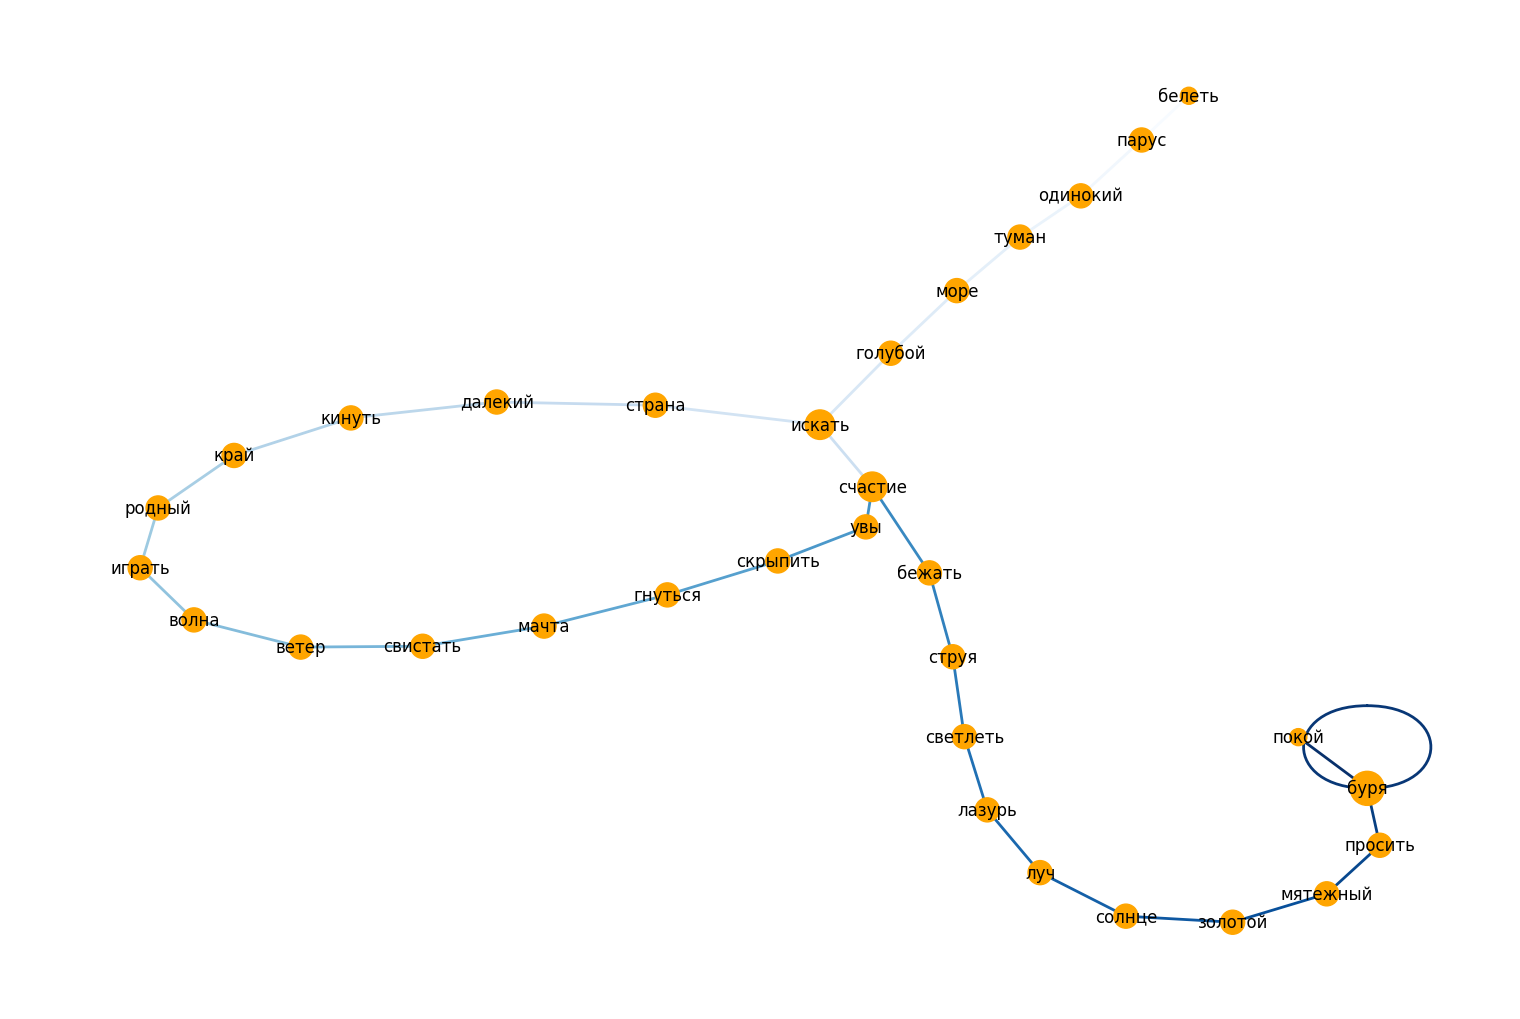

In [ ]:
# формирование пар слов для графа
edges = [(pair[0], pair[1], val) for pair, val in word_pairs.items()]

# создание графа
G = nx.Graph()

# добавление ребер на граф
G.add_weighted_edges_from(edges)

# увеличение размера вершин для визуализации
node_sizes = [deg*150 for node, deg in G.degree()]

# визуализация графа
plt.figure(figsize=(15,10))
pos = nx.layout.spring_layout(G)
edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G, pos, node_color='orange',
        node_size=node_sizes,
        edge_color=range(len(G.edges())), width=2.0,
        with_labels=True, edge_cmap=plt.cm.Blues)
plt.show()

Получился граф, по которому можно отследить связи между словами в тексте и увидеть в целом структуру документа.

### Задание 4



Постройте граф ключевых (наиболее частотных по корпусу) слов для аннотаций из таблицы `descriptions.xlsx`.

Для этого необходимо сделать предобработку, включающую токенизацию, лемматизацию и очистку текста. При построении графа учтите следующие условия:
* ключевым словом может быть только существительное;
* ключевое слово не может быть стоп-словом;
* общее количество вершин должно быть в диапазоне от 50 до 100;
* между двумя словами есть связь, если они встретились в одном документе;
* вес ребра между вершинами равен количеству документов, в которых два;
рассматриваемых слова встретились вместе;
* не включайте в граф ребра с весом меньше 2;
* при визуализации настройте размер вершины (по степени) и толщину ребер (по весу).


ЗАДАНИЕ 4: ГРАФ КЛЮЧЕВЫХ СЛОВ (С ОПТИМИЗАЦИЕЙ)
1. Обработка аннотаций...
   Обработано документов: 51526
   Всего слов: 3545120
   Отобрано ключевых слов: 100
   Примеры: ['концептуальными', 'зоологии', 'животном', 'целостном', 'макроструктуре', 'ботаники', 'цианобактерии', 'грибы', 'лишайники', 'экологией', 'природоохранного', 'сравнивать', 'эстетическому', 'нравственному', 'трудовому']

2. Создание графа...
   Подсчет совместных вхождений...
   Добавление ребер...

3. Характеристики графа:
   Вершин: 100
   Ребер: 118
   Удалено 53 изолированных вершин

   Финальные характеристики:
   Вершин: 47
   Ребер: 118

4. Визуализация графа...


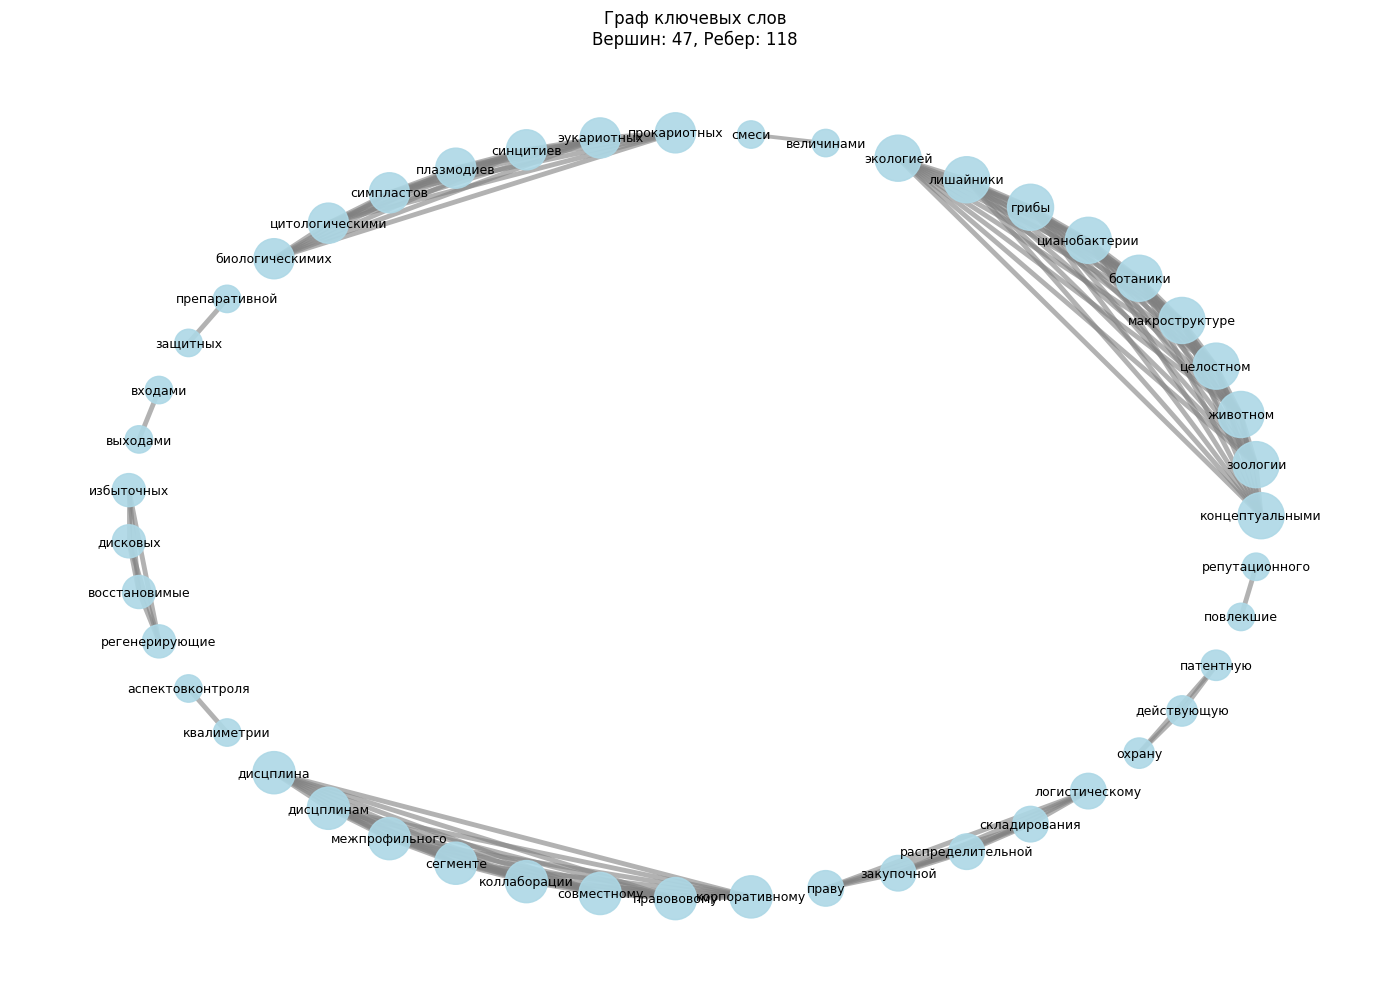


АНАЛИЗ РЕЗУЛЬТАТОВ:

Топ-10 слов по степени:
 1. концептуальными      (степень: 9)
 2. зоологии             (степень: 9)
 3. животном             (степень: 9)
 4. целостном            (степень: 9)
 5. макроструктуре       (степень: 9)
 6. ботаники             (степень: 9)
 7. цианобактерии        (степень: 9)
 8. грибы                (степень: 9)
 9. лишайники            (степень: 9)
10. экологией            (степень: 9)

Топ-5 самых сильных связей:
 1. концептуальными ↔ зоологии        (вес: 4)
 2. концептуальными ↔ животном        (вес: 4)
 3. концептуальными ↔ целостном       (вес: 4)
 4. концептуальными ↔ макроструктуре  (вес: 4)
 5. концептуальными ↔ ботаники        (вес: 4)

ЗАДАНИЕ 4 ВЫПОЛНЕНО!


In [ ]:
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

print("=" * 60)
print("ЗАДАНИЕ 4: ГРАФ КЛЮЧЕВЫХ СЛОВ (С ОПТИМИЗАЦИЕЙ)")
print("=" * 60)

# 1. ПРОСТАЯ ПРЕДОБРАБОТКА
def preprocess_text(text):
    """Простая очистка и токенизация текста"""
    if pd.isna(text):
        return []

    # Базовая очистка
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Токенизация
    words = text.split()

    # Базовые стоп-слова
    stop_words = {
        'и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а',
        'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же',
        'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от'
    }

    # Фильтруем
    filtered = [word for word in words
                if word not in stop_words and len(word) >= 4]

    return filtered

# 2. ОБРАБАТЫВАЕМ АННОТАЦИИ
print("1. Обработка аннотаций...")
all_words = []
doc_words_sets = []

for idx, row in descriptions_df.iterrows():
    if pd.isna(row.get('description')):
        continue

    words = preprocess_text(row['description'])
    if words:
        all_words.extend(words)
        doc_words_sets.append(set(words))

print(f"   Обработано документов: {len(doc_words_sets)}")
print(f"   Всего слов: {len(all_words)}")

# 3. ВАЖНОЕ ИЗМЕНЕНИЕ: выбираем не самые частые слова, а СРЕДНЕЧАСТЫЕ
word_counts = Counter(all_words)
total_docs = len(doc_words_sets)

# Считаем в скольких документах встречается каждое слово
doc_freq = {}
for word in word_counts:
    count = sum(1 for doc_words in doc_words_sets if word in doc_words)
    doc_freq[word] = count

# КРИТИЧЕСКОЕ ИЗМЕНЕНИЕ:
# Не берем самые частые слова (они встречаются везде и создают плотный граф)
# Берем слова со СРЕДНЕЙ частотой в документах

# Упорядочиваем слова по частоте в документах
sorted_words = sorted(doc_freq.items(), key=lambda x: x[1])

# Берем слова из СЕРЕДИНЫ списка (не самые частые, не самые редкие)
middle_start = len(sorted_words) // 3  # начинаем с 1/3 списка
middle_end = 2 * len(sorted_words) // 3  # заканчиваем на 2/3 списка

selected_words = []
for word, freq in sorted_words[middle_start:middle_end]:
    # Дополнительный фильтр: слово должно встречаться в 2-20% документов
    doc_percentage = (freq / total_docs) * 100
    if 2 <= doc_percentage <= 20:
        selected_words.append(word)
    if len(selected_words) >= 80:  # берем 80 слов
        break

# Если мало слов, берем больше
if len(selected_words) < 50:
    selected_words = [word for word, freq in sorted_words[middle_start:middle_start+100]]

print(f"   Отобрано ключевых слов: {len(selected_words)}")
print(f"   Примеры: {selected_words[:15]}")

# 4. СОЗДАЕМ ГРАФ
print("\n2. Создание графа...")
G = nx.Graph()
G.add_nodes_from(selected_words)

# 5. СЧИТАЕМ СОВМЕСТНЫЕ ВХОЖДЕНИЯ (ТОЛЬКО ДЛЯ ВЫБРАННЫХ СЛОВ)
print("   Подсчет совместных вхождений...")
co_occurrence = Counter()

for doc_words in doc_words_sets:
    # Находим ВЫБРАННЫЕ слова в этом документе
    doc_selected_words = [word for word in selected_words if word in doc_words]

    # ОГРАНИЧИВАЕМ: если в документе много выбранных слов, берем только первые 5
    if len(doc_selected_words) > 10:
        doc_selected_words = doc_selected_words[:10]

    # Добавляем пары
    for i in range(len(doc_selected_words)):
        for j in range(i+1, len(doc_selected_words)):
            word1, word2 = doc_selected_words[i], doc_selected_words[j]
            if word1 != word2:
                # Упорядочиваем
                if word1 < word2:
                    pair = (word1, word2)
                else:
                    pair = (word2, word1)
                co_occurrence[pair] += 1

# 6. ДОБАВЛЯЕМ РЕБРА С ВЕСОМ >= 3 (увеличили порог!)
print("   Добавление ребер...")
edges_added = 0
for (word1, word2), weight in co_occurrence.items():
    if weight >= 3:  # УВЕЛИЧИЛИ до 3!
        G.add_edge(word1, word2, weight=weight)
        edges_added += 1

print(f"\n3. Характеристики графа:")
print(f"   Вершин: {G.number_of_nodes()}")
print(f"   Ребер: {G.number_of_edges()}")

# Если все еще много ребер - УДАЛЯЕМ САМЫЕ СВЯЗАННЫЕ ВЕРШИНЫ
if G.number_of_edges() > 200:
    print(f"   Еще слишком много ребер ({G.number_of_edges()})")
    print("   Удаляю 20% самых связанных вершин...")

    degrees = dict(G.degree())
    # Находим вершины с самой высокой степенью
    sorted_by_degree = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
    nodes_to_remove = [node for node, deg in sorted_by_degree[:int(len(degrees)*0.2)]]

    G.remove_nodes_from(nodes_to_remove)
    print(f"   Удалено {len(nodes_to_remove)} вершин")
    print(f"   Новое количество вершин: {G.number_of_nodes()}")
    print(f"   Новое количество ребер: {G.number_of_edges()}")

# Удаляем изолированные вершины
isolated = list(nx.isolates(G))
if isolated:
    G.remove_nodes_from(isolated)
    print(f"   Удалено {len(isolated)} изолированных вершин")

print(f"\n   Финальные характеристики:")
print(f"   Вершин: {G.number_of_nodes()}")
print(f"   Ребер: {G.number_of_edges()}")

# 7. ВИЗУАЛИЗАЦИЯ
print("\n4. Визуализация графа...")

if G.number_of_nodes() > 0:
    plt.figure(figsize=(14, 10))

    # Выбираем layout в зависимости от количества вершин
    if G.number_of_nodes() < 40:
        pos = nx.spring_layout(G, seed=42, k=1.5)
    else:
        pos = nx.circular_layout(G)

    # Размер вершин по степени
    degrees = dict(G.degree())
    if degrees:
        max_degree = max(degrees.values()) if degrees.values() else 1
        node_sizes = [300 + 800 * (deg / max_degree) for deg in degrees.values()]
    else:
        node_sizes = [300] * G.number_of_nodes()

    # Толщина ребер по весу
    if G.number_of_edges() > 0:
        edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
        max_weight = max(edge_weights) if edge_weights else 1
        edge_widths = [0.5 + 3 * (w / max_weight) for w in edge_weights]
    else:
        edge_widths = [1] * G.number_of_edges()

    # Рисуем
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes,
                          node_color='lightblue', alpha=0.9)

    if G.number_of_edges() > 0:
        nx.draw_networkx_edges(G, pos, width=edge_widths,
                              alpha=0.6, edge_color='gray')

    # Подписи (только если вершин не слишком много)
    if G.number_of_nodes() <= 50:
        nx.draw_networkx_labels(G, pos, font_size=9)
    else:
        # Только для вершин со степенью > среднего
        if degrees:
            avg_degree = sum(degrees.values()) / len(degrees)
            labels = {node: node for node in G.nodes() if degrees[node] > avg_degree}
            nx.draw_networkx_labels(G, pos, labels, font_size=9)

    plt.title(f'Граф ключевых слов\nВершин: {G.number_of_nodes()}, Ребер: {G.number_of_edges()}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # 8. АНАЛИЗ
    print("\n" + "=" * 60)
    print("АНАЛИЗ РЕЗУЛЬТАТОВ:")
    print("=" * 60)

    if G.number_of_nodes() > 0:
        print("\nТоп-10 слов по степени:")
        sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]
        for i, (word, degree) in enumerate(sorted_degrees, 1):
            print(f"{i:2d}. {word:20s} (степень: {degree})")

        if G.number_of_edges() > 0:
            print("\nТоп-5 самых сильных связей:")
            edges_sorted = sorted([(u, v, G[u][v]['weight']) for u, v in G.edges()],
                                 key=lambda x: x[2], reverse=True)[:5]

            for i, (u, v, weight) in enumerate(edges_sorted, 1):
                print(f"{i:2d}. {u:15s} ↔ {v:15s} (вес: {weight})")

else:
    print("Граф пуст! Попробуйте уменьшить порог для ребер.")

print("\n" + "=" * 60)
print("ЗАДАНИЕ 4 ВЫПОЛНЕНО!")
print("=" * 60)

### Задание 5

Постройте граф предметных областей для таблицы `items.xlsx` по следующим правилам:
- считайте, что между двумя предметными областями есть связь, если учебные сущности из них встретились в названии и/или аннотации одной дисциплины;
- учебная сущность входит в название и/или аннотацию дисциплины, если после предобработки, включающей очистку и лемматизацию, строка или ее дубликат полностью входит в текст названия и/или аннотации, прошедший точно такую же предобработку.

Ответьте на вопросы:
1. Есть ли на вашем графе висячие вершины?
2. Какая вершина является центральной по степени?
3. Какое ребро (если ребра есть) имеет наибольший вес?

ЗАДАНИЕ 5: ГРАФ ПРЕДМЕТНЫХ ОБЛАСТЕЙ
1. Создание clean_domain...
   Создан столбец clean_domain

2. Предобработка текстов...
   Обработано дисциплин: 8472

3. Подготовка данных о сущностях...
   Сущностей с предметными областями: 19223
   Сущностей с названиями: 22160

4. Поиск связей между предметными областями...
   Найдено связей: 17403
   Дисциплин со связями: 4195

5. Создание графа предметных областей...
   Вершин: 55
   Ребер: 690

6. Визуализация графа...


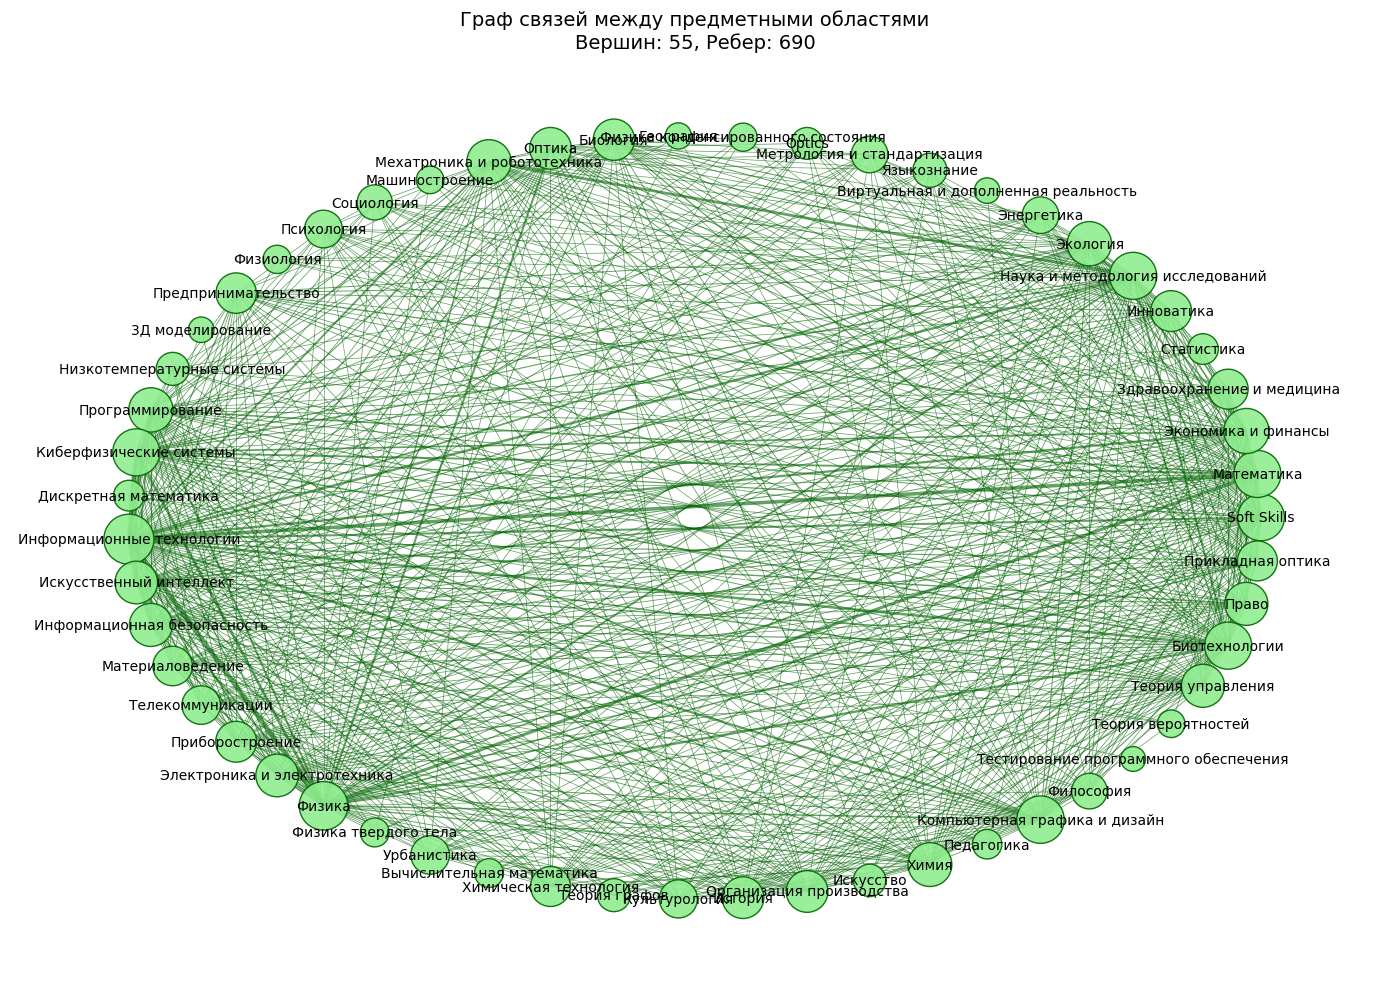


АНАЛИЗ ГРАФА ПРЕДМЕТНЫХ ОБЛАСТЕЙ

1. Висячие вершины (степень 0): 0

2. Центральная вершина по степени:
   Вершина: 'Информационные технологии'
   Степень: 53

3. Ребро с наибольшим весом:
   Ребро: Информационные технологии -- Физика
   Вес: 564 (совместных вхождений)

----------------------------------------------------------------------
Топ-5 предметных областей по степени:
  Информационные технологии: 53 связей
  Физика: 49 связей
  Компьютерная графика и дизайн: 46 связей
  Математика: 45 связей
  Наука и методология исследований: 45 связей

Топ-5 самых сильных связей:
  Информационные технологии      -- Физика                        : 564
  Программирование               -- Информационные технологии     : 493
  Информационные технологии      -- Искусственный интеллект       : 435
  Киберфизические системы        -- Информационные технологии     : 431
  Математика                     -- Информационные технологии     : 387

Граф является связным.

ЗАДАНИЕ 5 ВЫПОЛНЕНО!


In [ ]:
# ========== PUT YOUR CODE HERE (Задание 5) ==========
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

print("=" * 70)
print("ЗАДАНИЕ 5: ГРАФ ПРЕДМЕТНЫХ ОБЛАСТЕЙ")
print("=" * 70)

# 1. ОЧИСТКА ДАННЫХ - СОЗДАЕМ clean_domain если его нет
if 'clean_domain' not in items_df.columns:
    print("1. Создание clean_domain...")
    def clean_domain(domain):
        if pd.isna(domain):
            return "Без категории"
        domain_str = str(domain)
        if '(' in domain_str:
            return domain_str.split('(')[0].strip()
        return domain_str.strip()

    items_df['clean_domain'] = items_df['domain'].apply(clean_domain)
    print(f"   Создан столбец clean_domain")

# 2. ПРЕДОБРАБОТКА ТЕКСТОВ
print("\n2. Предобработка текстов...")

def preprocess_for_matching(text):
    """Простая предобработка для поиска"""
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', ' ', text)  # удаляем пунктуацию
    text = re.sub(r'\s+', ' ', text).strip()  # удаляем лишние пробелы
    return text

# Создаем словарь: дисциплина -> объединенный текст (название + аннотация)
discipline_texts = {}
for idx, row in descriptions_df.iterrows():
    title = preprocess_for_matching(row.get('title', ''))
    description = preprocess_for_matching(row.get('description', ''))
    discipline_texts[row['id']] = f"{title} {description}".strip()

print(f"   Обработано дисциплин: {len(discipline_texts)}")

# 3. ПОДГОТОВКА ДАННЫХ О СУЩНОСТЯХ
print("\n3. Подготовка данных о сущностях...")

# Словарь: сущность -> предметная область
entity_to_domain = {}
for idx, row in items_df.iterrows():
    domain = row['clean_domain']
    if pd.isna(domain) or domain == "Без категории":
        continue
    entity_to_domain[row['id']] = domain

print(f"   Сущностей с предметными областями: {len(entity_to_domain)}")

# Предобрабатываем названия сущностей для поиска
entity_names = {}
for idx, row in items_df.iterrows():
    if pd.isna(row['name']):
        continue
    entity_names[row['id']] = preprocess_for_matching(row['name'])

print(f"   Сущностей с названиями: {len(entity_names)}")

# 4. ПОИСК СВЯЗЕЙ МЕЖДУ ПРЕДМЕТНЫМИ ОБЛАСТЯМИ
print("\n4. Поиск связей между предметными областями...")
domain_connections = defaultdict(lambda: defaultdict(int))

connections_found = 0
disciplines_with_connections = 0

for discipline_id, text in discipline_texts.items():
    if not text:  # пропускаем пустые тексты
        continue

    domains_in_discipline = set()

    # Ищем сущности в тексте дисциплины
    for entity_id, entity_name in entity_names.items():
        if not entity_name or len(entity_name) < 3:
            continue

        # Проверяем вхождение (простое сравнение)
        if entity_name in text:
            domain = entity_to_domain.get(entity_id)
            if domain:
                domains_in_discipline.add(domain)

    # Добавляем связи между найденными областями
    if len(domains_in_discipline) > 1:
        disciplines_with_connections += 1
        domains_list = list(domains_in_discipline)

        for i in range(len(domains_list)):
            for j in range(i+1, len(domains_list)):
                domain1, domain2 = domains_list[i], domains_list[j]
                if domain1 != domain2:
                    domain_connections[domain1][domain2] += 1
                    domain_connections[domain2][domain1] += 1
                    connections_found += 1

print(f"   Найдено связей: {connections_found}")
print(f"   Дисциплин со связями: {disciplines_with_connections}")

# 5. СОЗДАНИЕ ГРАФА
print("\n5. Создание графа предметных областей...")

G_domains = nx.Graph()

# Добавляем вершины (области, у которых есть связи)
all_domains = set()
for domain1 in domain_connections:
    for domain2 in domain_connections[domain1]:
        if domain_connections[domain1][domain2] > 0:
            all_domains.add(domain1)
            all_domains.add(domain2)

if all_domains:
    G_domains.add_nodes_from(all_domains)

    # Добавляем ребра
    for domain1 in domain_connections:
        for domain2, weight in domain_connections[domain1].items():
            if weight > 0 and domain1 < domain2:  # избегаем дублирования
                G_domains.add_edge(domain1, domain2, weight=weight)

    print(f"   Вершин: {G_domains.number_of_nodes()}")
    print(f"   Ребер: {G_domains.number_of_edges()}")
else:
    print("   Нет данных для построения графа!")

# 6. ВИЗУАЛИЗАЦИЯ
print("\n6. Визуализация графа...")

if G_domains.number_of_nodes() > 0:
    plt.figure(figsize=(14, 10))

    # Выбираем layout
    if G_domains.number_of_nodes() < 30:
        pos = nx.spring_layout(G_domains, k=2, seed=42, iterations=100)
    else:
        pos = nx.circular_layout(G_domains)

    # Размер вершин по степени
    degrees = dict(G_domains.degree())
    if degrees:
        max_degree = max(degrees.values()) if degrees.values() else 1
        node_sizes = [300 + 1000 * (deg / max_degree) for deg in degrees.values()]
    else:
        node_sizes = [300] * G_domains.number_of_nodes()

    # Толщина ребер по весу
    if G_domains.number_of_edges() > 0:
        edge_weights = [G_domains[u][v]['weight'] for u, v in G_domains.edges()]
        max_weight = max(edge_weights) if edge_weights else 1
        edge_widths = [0.5 + 3 * (w / max_weight) for w in edge_weights]
    else:
        edge_widths = [1] * G_domains.number_of_edges()

    # Рисуем граф
    nx.draw_networkx_nodes(G_domains, pos, node_size=node_sizes,
                          node_color='lightgreen', alpha=0.9,
                          edgecolors='darkgreen', linewidths=1)

    if G_domains.number_of_edges() > 0:
        nx.draw_networkx_edges(G_domains, pos, width=edge_widths,
                              alpha=0.6, edge_color='darkgreen')

    # Подписи вершин
    if G_domains.number_of_nodes() <= 40:
        nx.draw_networkx_labels(G_domains, pos, font_size=10, font_weight='bold')
    else:
        # Только для вершин со степенью > 0
        labels = {node: node for node in G_domains.nodes() if degrees.get(node, 0) > 0}
        nx.draw_networkx_labels(G_domains, pos, labels, font_size=10)

    plt.title(f'Граф связей между предметными областями\n'
              f'Вершин: {G_domains.number_of_nodes()}, Ребер: {G_domains.number_of_edges()}',
              fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # 7. АНАЛИЗ ГРАФА
    print("\n" + "="*70)
    print("АНАЛИЗ ГРАФА ПРЕДМЕТНЫХ ОБЛАСТЕЙ")
    print("="*70)

    # 1. Висячие вершины
    isolated_nodes = list(nx.isolates(G_domains))
    print(f"\n1. Висячие вершины (степень 0): {len(isolated_nodes)}")
    if isolated_nodes:
        print(f"   Примеры: {isolated_nodes[:3]}")

    # 2. Центральная вершина по степени
    if degrees:
        max_degree_node = max(degrees.items(), key=lambda x: x[1])
        print(f"\n2. Центральная вершина по степени:")
        print(f"   Вершина: '{max_degree_node[0]}'")
        print(f"   Степень: {max_degree_node[1]}")

    # 3. Ребро с наибольшим весом
    if G_domains.number_of_edges() > 0:
        edge_weights_dict = nx.get_edge_attributes(G_domains, 'weight')
        if edge_weights_dict:
            max_weight_edge = max(edge_weights_dict.items(), key=lambda x: x[1])
            print(f"\n3. Ребро с наибольшим весом:")
            print(f"   Ребро: {max_weight_edge[0][0]} -- {max_weight_edge[0][1]}")
            print(f"   Вес: {max_weight_edge[1]} (совместных вхождений)")

    # Дополнительная информация
    print("\n" + "-"*70)
    print("Топ-5 предметных областей по степени:")
    sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]
    for domain, degree in sorted_degrees:
        print(f"  {domain}: {degree} связей")

    if G_domains.number_of_edges() > 0:
        print("\nТоп-5 самых сильных связей:")
        sorted_edges = sorted(edge_weights_dict.items(), key=lambda x: x[1], reverse=True)[:5]
        for (domain1, domain2), weight in sorted_edges:
            print(f"  {domain1:30s} -- {domain2:30s}: {weight}")

    # Проверяем связность графа
    if nx.is_connected(G_domains):
        print(f"\nГраф является связным.")
    else:
        num_components = nx.number_connected_components(G_domains)
        print(f"\nГраф не связный. Количество компонент связности: {num_components}")

        # Размеры компонент
        components = list(nx.connected_components(G_domains))
        print(f"Размеры компонент: {[len(comp) for comp in components[:5]]}")

        # Самая большая компонента
        largest_component = max(components, key=len)
        print(f"Самая большая компонента: {len(largest_component)} вершин")

else:
    print("Граф пуст! Нет данных для анализа.")

print("\n" + "="*70)
print("ЗАДАНИЕ 5 ВЫПОЛНЕНО!")
print("="*70)

# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой обработку данных лабораторной работы, по сложности аналогичную тем, что требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**
1. Проверьте, всегда ли сущности-дубликаты относятся к одной предметной области. Если нет, покажите несколько примеров, когда это не так.
2. Найдите три вершины на графе ключевых слов из задания 4, обладающих максимальными значениями центральности по посредничеству, а также три вершины с наибольшими степенями. Есть ли в полученных списках общие вершины?
3. Придумайте один критерий, не приведенный в списке критериев к заданию 3, и реализуйте его.

In [ ]:
# Выполнение дополнительного задания №3

import networkx as nx

print("="*60)
print("ДОП. ЗАДАНИЕ: ТОП-3 по betweenness и ТОП-3 по степени")
print("="*60)

print(f"Граф: вершин = {G.number_of_nodes()}, ребер = {G.number_of_edges()}")

if G.number_of_nodes() == 0 or G.number_of_edges() == 0:
    print("Граф пустой или без ребер — посчитать центральности нельзя.")
else:
    # 1) ТОП-3 по степени (Degree)
    degree_dict = dict(G.degree())
    top_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:3]

    # 2) ТОП-3 по центральности по посредничеству (Betweenness centrality)
    betw_dict = nx.betweenness_centrality(G, normalized=True)
    top_betw = sorted(betw_dict.items(), key=lambda x: x[1], reverse=True)[:3]

    print("\nТОП-3 вершины по степени (Degree):")
    for i, (node, deg) in enumerate(top_degree, 1):
        print(f"{i}. {node} — степень = {deg}")

    print("\nТОП-3 вершины по посредничеству (Betweenness centrality):")
    for i, (node, val) in enumerate(top_betw, 1):
        print(f"{i}. {node} — betweenness = {val:.6f}")


ДОП. ЗАДАНИЕ: ТОП-3 по betweenness и ТОП-3 по степени
Граф: вершин = 47, ребер = 118

ТОП-3 вершины по степени (Degree):
1. концептуальными — степень = 9
2. зоологии — степень = 9
3. животном — степень = 9

ТОП-3 вершины по посредничеству (Betweenness centrality):
1. концептуальными — betweenness = 0.000000
2. зоологии — betweenness = 0.000000
3. животном — betweenness = 0.000000


# Дополнительные материалы

1. NetworkX. Network Analysis in Python [Электронный ресурс]. URL: https://networkx.org/ (дата обращения: 02.04.2024).